### Реализовать метод опорных векторов для линейно разделимого случая 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.optimize import minimize

In [2]:
df=pd.read_csv('svm_data.csv',names=['x1','x2','y'])
df

,x1,x2,y
0,0.057833,-1.398096,-1
1,0.236386,0.283487,-1
2,-0.819391,0.809699,1
3,1.491693,-1.704607,-1
4,-0.567840,-0.071000,1
5,-0.694414,-0.992279,1
6,0.293799,0.660239,-1
7,-0.813164,1.480960,1
8,-1.503199,0.811566,1
9,0.637056,0.303951,-1


<AxesSubplot:xlabel='x1', ylabel='x2'>

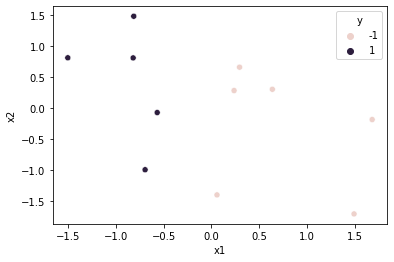

In [3]:
sns.scatterplot(data=df,x='x1',y='x2',hue='y')

In [4]:
X=df[['x1','x2']]
y=df.y

In [5]:
def fun(list_of_labda):
    lagrangian=0
    lagr=0
    for i in range(len(X.index)):
        lagr=0
        for j in range(len(X.index)):
            lagr=lagr+1/2*list_of_labda[i]*list_of_labda[j]*y.iloc[i]*y.iloc[j]*np.dot(X.iloc[i].values,X.iloc[j].values)
        lagrangian=lagrangian+lagr
    lagrangian=np.sum(list_of_labda)-lagrangian
    return lagrangian

In [6]:
def ogranich(list_of_labda):
    s=0
    for i in range(len(y.index)):
        s=s+y.iloc[i]*list_of_labda[i]
    return s

In [7]:
ogranichenie=[{'type':'eq','fun':ogranich}]
list_of_labda=np.zeros(len(df.index))
bnds=[(0,None) for i in range(len(df.index))]
result = minimize(lambda x: -fun(x),list_of_labda,constraints=ogranichenie ,bounds=bnds)
lamda=result.x
result

     fun: -3.4417307142086897
     jac: array([-0.46216893, -0.46203375,  1.36092269,  3.36185595,  0.46114427,
        0.53619397, -0.41660365,  1.53049919,  3.14465371,  0.57715818,
        3.43520609])
 message: 'Optimization terminated successfully'
    nfev: 183
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([8.90265990e-01, 2.55146302e+00, 0.00000000e+00, 0.00000000e+00,
       3.44172901e+00, 1.41257991e-16, 1.33373130e-15, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.93875709e-15])

In [8]:
fun(lamda)

3.4417307142086897

In [9]:
theta=sum([lamda[i]*y.iloc[i]*X.iloc[i].values for i in range(len(X.index))])

In [10]:
theta0=(1-y.iloc[0]*np.dot(X.iloc[0].values,theta))/y.iloc[0]
theta0

-0.46183142957642087

In [11]:
np.sign(np.dot(X.values,theta)+theta0)

array([-1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.])

In [12]:
def fun_a(list_of_x):
    return np.dot(list_of_x,theta)+theta0
def fun_a_1(list_of_x):
    return np.dot(list_of_x,theta)+theta0+1
def fun_a__1(list_of_x):
    return np.dot(list_of_x,theta)+theta0-1

In [13]:
ogranichenie=[{'type':'eq','fun':fun_a}]
ogranichenie1=[{'type':'eq','fun':fun_a_1}]
ogranichenie2=[{'type':'eq','fun':fun_a__1}]
list_of_x=[-3,-3]
result = minimize(lambda x: fun_a(x),list_of_x,constraints=ogranichenie)
xx=result.x

ogranichenie=[{'type':'eq','fun':fun_a}]
list_of_x=[3,3]
result = minimize(lambda x: fun_a(x),list_of_x,constraints=ogranichenie)
xx1=result.x

ogranichenie=[{'type':'eq','fun':fun_a}]
list_of_x=[-3,-3]
result = minimize(lambda x: fun_a_1(x),list_of_x,constraints=ogranichenie1)
xx2=result.x

ogranichenie=[{'type':'eq','fun':fun_a}]
list_of_x=[3,3]
result = minimize(lambda x: fun_a_1(x),list_of_x,constraints=ogranichenie1)
xx3=result.x

ogranichenie=[{'type':'eq','fun':fun_a}]
list_of_x=[-3,-3]
result = minimize(lambda x: fun_a__1(x),list_of_x,constraints=ogranichenie2)
xx4=result.x

ogranichenie=[{'type':'eq','fun':fun_a}]
list_of_x=[3,3]
result = minimize(lambda x: fun_a__1(x),list_of_x,constraints=ogranichenie2)
xx5=result.x

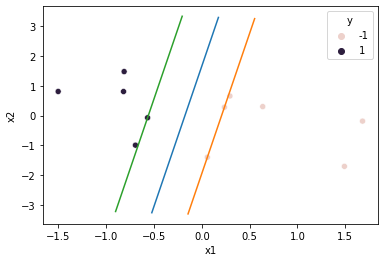

In [14]:
sns.scatterplot(data=df,x='x1',y='x2',hue='y')
plt.plot([xx[0],xx1[0]],[xx[1],xx1[1]])
plt.plot([xx2[0],xx3[0]],[xx2[1],xx3[1]])
plt.plot([xx4[0],xx5[0]],[xx4[1],xx5[1]])